### PCA


We try here to create data and apply the scikit learn's PCA api - and see how it works

##### 1. Creating data

Let us do in these steps
1. Let data be 15 dimensional( ie $R^{15}$ and having N=1000 data points.
2. We create 5 PC vectors (challenge: how to create 5 orthogonal $R^{15}$-vectors?)  - use scipy
3. Create each data point as a linear combination of these vectors


In [61]:
from scipy.stats import ortho_group
from scipy import random
import numpy as np
from numpy import random as npr

npr.seed(seed=144)


def get_k_ndim_pc_vectors(k, n):
    x = ortho_group.rvs(dim = n)
    return x[range(k),:]

#x = get_k_n_dim_pc_vectors(15, 5)

n = 3    #dimensions
num_main_pcs = 2 #number of main explaining components
tot = 25 #Total number of points
pc_vecs = get_k_ndim_pc_vectors(n, n)

#Though rows and columns are all orthogonal
pc_vecs_as_rows = pc_vecs.T

#pc_vecs
print(pc_vecs_as_rows.shape)

(3, 3)


In [62]:
# Let us make sure these are orthogonal - It will be like identity vector
pc_vecs.dot(pc_vecs.T).round(2)


array([[ 1., -0.,  0.],
       [-0.,  1., -0.],
       [ 0., -0.,  1.]])

Let us do linear combination of these  PC vectors($R^{15}$) to produce $N=1000$ points.
Evey point will have a different linear combination. So we get **pc_loadings** of $5 x 1000$ so that we get 15 x 1000 dim matrix (whose each column will be generated point ie $R^{15}$ vector)

We also add noise loadings **random_noise**, these loadings will be small as compared to actual participating PC's which are first to 5th. These noisy loadings will add in orthogonal directions to span of first five PCs (which are going to explain for most variation).

In [63]:
npr.random_integers(low = 1, high=10, size=(num_main_pcs,tot))


/Users/jvsingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  """Entry point for launching an IPython kernel.


array([[ 2,  9,  7,  3,  3,  2,  2,  3,  7,  6,  5,  3,  8,  8,  3,  2,
         5,  8,  4,  7,  5,  1,  1,  2,  2],
       [ 6,  1,  5,  5,  5,  4,  6,  9,  4,  2,  7, 10,  2,  1,  1,  8,
         7,  4,  6,  3,  7,  4, 10,  1,  7]])

In [64]:
# Main PC loading coefficients for 1000 points
pc_loadings = npr.random_integers(low = 1, high=10, size=(num_main_pcs,tot)) - 5
print(pc_loadings.shape)
print(pc_loadings)

(2, 25)
[[-4  2  1 -1  3  5 -1  0  5 -1 -4  3 -4  0  0 -2 -2 -2  2 -1  1  3  5 -3
  -4]
 [ 0  0 -4  2  3 -3  3  3 -1  3  2 -2  1 -4  5  4 -2  4  4 -4 -1 -4  2  2
   4]]


/Users/jvsingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  


In [65]:
# Orthogonal loading coefficients for 1000 points
random_noise = random.uniform(low = -0.01, high = + 0.01, size = ((n-num_main_pcs),tot)) # npr.normal(size = ((n-num_main_pcs),tot)) * 0.001
final_pc_loadings = np.concatenate((pc_loadings, random_noise), axis=0).T
print("final_pc_loadings shape:" + str(final_pc_loadings.shape))
np.round(final_pc_loadings,3)

final_pc_loadings shape:(25, 3)


array([[-4.e+00,  0.e+00, -8.e-03],
       [ 2.e+00,  0.e+00,  5.e-03],
       [ 1.e+00, -4.e+00, -7.e-03],
       [-1.e+00,  2.e+00,  7.e-03],
       [ 3.e+00,  3.e+00,  6.e-03],
       [ 5.e+00, -3.e+00, -8.e-03],
       [-1.e+00,  3.e+00,  1.e-03],
       [ 0.e+00,  3.e+00,  2.e-03],
       [ 5.e+00, -1.e+00,  8.e-03],
       [-1.e+00,  3.e+00,  2.e-03],
       [-4.e+00,  2.e+00, -9.e-03],
       [ 3.e+00, -2.e+00,  9.e-03],
       [-4.e+00,  1.e+00,  5.e-03],
       [ 0.e+00, -4.e+00, -9.e-03],
       [ 0.e+00,  5.e+00, -9.e-03],
       [-2.e+00,  4.e+00,  2.e-03],
       [-2.e+00, -2.e+00, -7.e-03],
       [-2.e+00,  4.e+00, -9.e-03],
       [ 2.e+00,  4.e+00, -2.e-03],
       [-1.e+00, -4.e+00,  6.e-03],
       [ 1.e+00, -1.e+00, -9.e-03],
       [ 3.e+00, -4.e+00,  2.e-03],
       [ 5.e+00,  2.e+00, -6.e-03],
       [-3.e+00,  2.e+00, -9.e-03],
       [-4.e+00,  4.e+00,  1.e-03]])

In [66]:
pc_vecs_as_rows

array([[-0.99602866, -0.07097906,  0.05374832],
       [-0.02515794,  0.80346097,  0.59482564],
       [ 0.08540484, -0.59111119,  0.80205584]])

In [67]:
#generate all 1000 points
all_points   = final_pc_loadings.dot(pc_vecs_as_rows) #+ random_noise
np.savetxt("/tmp/all_points.csv", all_points, delimiter=",")
print("Shape all_points: " + str(all_points.shape))
print(all_points)

Shape all_points: (25, 3)
[[ 3.98345612  0.28847406 -0.22117761]
 [-1.99163805 -0.14486001  0.1114341 ]
 [-0.89600422 -3.28061957 -2.33125765]
 [ 0.94626979  1.67404585  1.14113387]
 [-3.06304894  2.19390997  1.95051943]
 [-4.90532197 -2.76076222 -1.5218629 ]
 [ 0.9206309   2.48083561  1.73144281]
 [-0.07532413  2.40934695  1.78588259]
 [-4.95429544 -1.16313143 -0.31960482]
 [ 0.92076033  2.47993981  1.73265829]
 [ 3.93306435  1.89592129  0.96776094]
 [-2.9369712  -1.82538855 -1.02090366]
 [ 3.95940368  1.08428353  0.38403007]
 [ 0.09982187 -3.20823852 -2.38690828]
 [-0.12654306  4.02251917  2.96705311]
 [ 1.89155775  3.35488717  2.27304723]
 [ 2.04178296 -1.46087864 -1.30269095]
 [ 1.89067985  3.36096338  2.26480266]
 [-2.09285143  3.07300955  2.48527439]
 [ 1.09717258 -3.14640972 -2.42824096]
 [-0.97161791 -0.86926857 -0.54809428]
 [-2.88724935 -3.42819909 -2.21613355]
 [-5.03097046  1.25556538  1.45359131]
 [ 2.93697294  1.82537657  1.02091992]
 [ 3.88360626  3.49690629  2.16546783]

all_points is a **tot x n** where each column is the point as mentioned before

##### ------------------------  Data generation part completes here ------------------------ #####

Let us start doing PCA of **all_points** and see if we can recover the components(ie PCs and the coefficients **pc_loadings** and data back)


In [68]:
print("Shape of all_points:" + str(all_points.shape))
#Standardising 
means_of_15_dims = np.apply_over_axes(lambda x, axis: np.mean(x, axis = axis), all_points, axes = 0)
means_of_15_dims
print("means{}:".format(means_of_15_dims.shape))
print(means_of_15_dims)

sd_of_15_dims = np.apply_over_axes(lambda x, axis: np.std(x, axis = axis, ddof=0), all_points, axes = 0)
sd_of_15_dims
print("sds {}:".format(sd_of_15_dims.shape))
print(sd_of_15_dims)

print("all_points shape:" + str(all_points.shape))

Shape of all_points:(25, 3)
means(1, 3):
[[-0.05706627  0.54432913  0.40552576]]
sds (1, 3):
[[2.80102864 2.41998939 1.69526724]]
all_points shape:(25, 3)


In [69]:
scaled = (all_points - means_of_15_dims)/sd_of_15_dims
print("shape scaled: " + str(scaled.shape))
scaled

shape scaled: (25, 3)


array([[ 1.44251377, -0.1057257 , -0.36967821],
       [-0.69066476, -0.28479015, -0.17347805],
       [-0.29951067, -1.58056425, -1.61436694],
       [ 0.35820271,  0.46682714,  0.43391867],
       [-1.07317098,  0.68164796,  0.911357  ],
       [-1.73088401, -1.36574622, -1.1369232 ],
       [ 0.34904933,  0.8002128 ,  0.78212864],
       [-0.00651827,  0.7706719 ,  0.81424144],
       [-1.74836812, -0.70556531, -0.42773821],
       [ 0.34909554,  0.79984263,  0.78284562],
       [ 1.42452332,  0.5585116 ,  0.33164989],
       [-1.02815976, -0.97922647, -0.84141862],
       [ 1.43392677,  0.22312263, -0.01267982],
       [ 0.0560109 , -1.55065459, -1.647194  ],
       [-0.02480403,  1.43727491,  1.51098735],
       [ 0.69568158,  1.16139271,  1.1016089 ],
       [ 0.74931373, -0.82860189, -1.0076386 ],
       [ 0.69536816,  1.16390355,  1.09674561],
       [-0.72679912,  1.04491385,  1.22679692],
       [ 0.41207678, -1.52510539, -1.67157522],
       [-0.32650563, -0.58413384, -0.562

In [70]:
from sklearn.preprocessing import StandardScaler
x_transformed = StandardScaler().fit_transform(all_points)
x_transformed

array([[ 1.44251377, -0.1057257 , -0.36967821],
       [-0.69066476, -0.28479015, -0.17347805],
       [-0.29951067, -1.58056425, -1.61436694],
       [ 0.35820271,  0.46682714,  0.43391867],
       [-1.07317098,  0.68164796,  0.911357  ],
       [-1.73088401, -1.36574622, -1.1369232 ],
       [ 0.34904933,  0.8002128 ,  0.78212864],
       [-0.00651827,  0.7706719 ,  0.81424144],
       [-1.74836812, -0.70556531, -0.42773821],
       [ 0.34909554,  0.79984263,  0.78284562],
       [ 1.42452332,  0.5585116 ,  0.33164989],
       [-1.02815976, -0.97922647, -0.84141862],
       [ 1.43392677,  0.22312263, -0.01267982],
       [ 0.0560109 , -1.55065459, -1.647194  ],
       [-0.02480403,  1.43727491,  1.51098735],
       [ 0.69568158,  1.16139271,  1.1016089 ],
       [ 0.74931373, -0.82860189, -1.0076386 ],
       [ 0.69536816,  1.16390355,  1.09674561],
       [-0.72679912,  1.04491385,  1.22679692],
       [ 0.41207678, -1.52510539, -1.67157522],
       [-0.32650563, -0.58413384, -0.562

We see above that Scikit's standard scalar iz just z-scoring as we do directly in **scaled**

In [71]:
import pandas as pd
in_data = pd.DataFrame(x_transformed)

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components = in_data.shape[1], svd_solver = 'full')
pca.fit(in_data)

PCA(n_components=3, svd_solver='full')

In [73]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[7.13028215e-01 2.86968494e-01 3.29091859e-06]
[0.71302822 0.99999671 1.        ]


In [74]:
# Let us try to discover how many components are needed
# var_ret is [0,1], which is fraction of total variance retained
def get_num_components(in_mat, var_ret):
    pca = PCA(n_components = in_mat.shape[1], svd_solver = 'full')
    pca.fit(in_mat)
    expl = pca.explained_variance_ratio_
    needed_components = 1 + np.min(np.where(np.cumsum(expl/sum(expl)) >= var_ret))
    return needed_components

In [75]:
explained_by = get_num_components(in_data, 0.99)
explained_by

2

In [76]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'full')
pca.fit(in_data)
pca.components_

array([[-0.3445242 , -0.67646012, -0.6509261 ],
       [-0.93093624,  0.15675175,  0.32982815],
       [ 0.12108178, -0.71960447,  0.68374601]])

As expected, we have **explained_by** principal components which explain the variance in the data.

In [77]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components = explained_by)
#pca.fit(in_data)
#pca.components_
pca.explained_variance_ratio_
pca.components_

array([[-0.3445242 , -0.67646012, -0.6509261 ],
       [-0.93093624,  0.15675175,  0.32982815],
       [ 0.12108178, -0.71960447,  0.68374601]])

In [78]:
pca.components_.shape

(3, 3)

**components_** : ndarray of shape (n_components, n_features)
Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.


In [79]:
pca.components_[0,:]

array([-0.3445242 , -0.67646012, -0.6509261 ])

In [80]:
## PC vectors are orthogonal to each other
print(pca.components_.shape)
np.round(pca.components_.dot(pca.components_.T),2)

(3, 3)


array([[ 1., -0., -0.],
       [-0.,  1., -0.],
       [-0., -0.,  1.]])

In [81]:
#Lets us see if our components are perpendicular/prallel to our starting generator vectors pc_vecs 
pca.components_  #5 x 15


array([[-0.3445242 , -0.67646012, -0.6509261 ],
       [-0.93093624,  0.15675175,  0.32982815],
       [ 0.12108178, -0.71960447,  0.68374601]])

In [82]:
[ pca.components_[0,:].dot(pc_vecs_as_rows[i,:].T) for i in range(n)]

[0.3561842968178682, -0.9220293201736567, -0.15163996650113476]

In [83]:
#pca.fit?

In [99]:
### example from sklearn documentation
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

print("Explained Variance Ratios:")
print(pca.explained_variance_ratio_)

print("Singular Values:")
print(pca.singular_values_)

print("Components:")
print(pca.components_)


print("Expect orthogonal components give identity matrix:")
print(pca.components_.dot(pca.components_.T))

#Lets geometrically see orientation of vectors
import math
print("degree of first:" + str(math.atan(pca.components_[0,1]/pca.components_[0,0]) * (180.0/math.pi)))
print("degree of second:" + str(math.atan(pca.components_[1,1]/pca.components_[1,0]) * (180.0/math.pi)))


Explained Variance Ratios:
[0.99244289 0.00755711]
Singular Values:
[6.30061232 0.54980396]
Components:
[[-0.83849224 -0.54491354]
 [ 0.54491354 -0.83849224]]
Expect orthogonal components give identity matrix:
[[ 1.00000000e+00 -3.40594983e-18]
 [-3.40594983e-18  1.00000000e+00]]
degree of first:33.018755512710904
degree of second:-56.981244487289096


In [96]:
np.abs(math.atan(pca.components_[0,1]/pca.components_[0,0]) * (180.0/math.pi)) + \
np.abs(math.atan(pca.components_[1,1]/pca.components_[1,0]) * (180.0/math.pi))

90.0

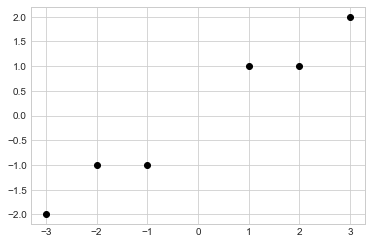

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

plt.plot(X[:,0], X[:,1], 'o', color='black');